# Weierstrass-fourier-series

This is my humble replication of theories mentioned in _"Discrete Weierstrass Fourier Transform
and Experiments(2016)"_ by _Sheng Zhang, Brendan Harding_ 

Approximate a function by customizing the 'target_fuction' function. Vary 'terms' and 'a' $([0, 1))$ to vary approximations. 

Reference: _Discrete Weierstrass Fourier Transform and Experiments - Sheng Zhang, Brendan Harding_

https://arxiv.org/pdf/1502.07734.pdf

In [1]:
import sys
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def cn(n):
    c = z*np.exp(-1j*2*n*np.pi*time/period)
    return c.sum()/c.size

def f(x, terms):
    f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x/period) for i in range(1,terms)])
    return cn(0)+f.sum()

def ek(k,x):
    if (k == 0):
        return 1
    elif (k % 2 != 0):
        y = np.array([(a**m)*cmath.exp(2*np.pi*1j*k*(2**m)*x) for m in range(infinity)])
        return np.sqrt(1-(a**2)) * y.sum()
    elif (k % 2 == 0): 
        y = np.array([(a**m)*cmath.exp(2*np.pi*1j*k*(2**m)*x) for m in range(infinity)])
        x = np.array([(a**m)*cmath.exp(2*np.pi*1j*int(k/2)*(2**m)*x) for m in range(infinity)])
        return ((np.sqrt(1-(a**2)) * y.sum())-(a*(np.sqrt(1-(a**2)) * x.sum()))) / np.sqrt(1-a**2)

def ak(k):
    if (k == 0):
        return coefs[0]
    elif (k % 2 != 0):
        y = np.array([(a**m)*coefs[k*(2**m)] for m in range(infinity)])
        return np.sqrt(1-(a**2)) * y.sum()
    elif (k % 2 == 0):
        y = np.array([(a**m)*coefs[k*(2**m)] for m in range(infinity)])
        x = np.array([(a**m)*coefs[int(k/2)*(2**m)] for m in range(infinity)])
        return ((np.sqrt(1-(a**2)) * y.sum()) - (a*(np.sqrt(1-(a**2)) * x .sum()))) / np.sqrt(1-a**2)

def functionGuy(x):
    return x**2+.5

def wFourier(x):
    y = np.array([ak(k)*ek(k,x) for k in range(1,terms)])
    return coefs[0]+2*y.sum().real


In [30]:
def target_function(x):
    return np.cos(3*x*np.pi)/2

/Users/wangren/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


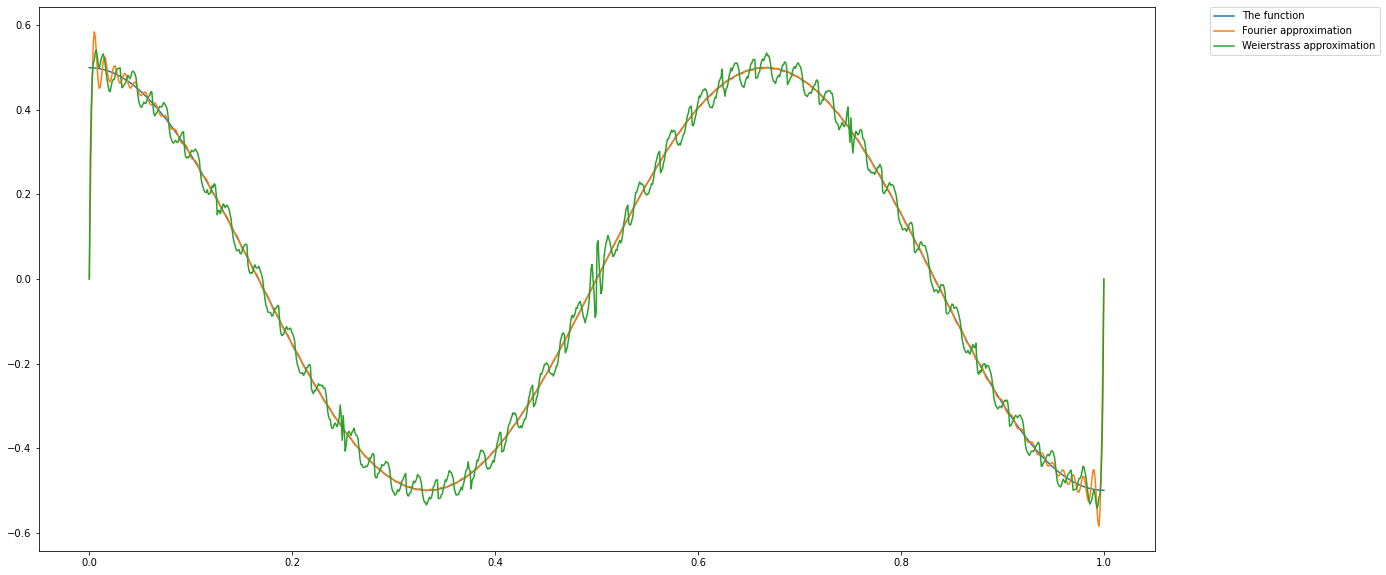

In [33]:
a = .5
b = 2
infinity = 5
timeSteps = 1024
period = 1
terms = 100
time = np.linspace(0,period,num=timeSteps)
maxCoefs = terms*infinity*(2**infinity)
z = np.array([target_function(t).real for t in time])
l = np.array([f(t, terms).real for t in time])
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time, z,label="The function")
ax.plot(time, l,label="Fourier approximation")
coefs = np.array([cn(n) for n in range(maxCoefs)])
points = np.array([wFourier(t) for t in time])
ax.plot(time, points,label="Weierstrass approximation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()